In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv("voice.csv")

Ik heb het bestand ingelezen met pandas.

In [6]:
df2 = df[["meanfreq", "IQR", "mode", "meandom", "meanfun", "median", "label"]]

Ik heb de dataset "Gender Recognition by Voice" gekozen omdat dit mij simmpelweg het meest interessant lijkt. Hierbij heb ik gekeken naar welke variabelen er aanwezig zijn. Ik wist niet direct welke 7 variabelen ik moest kiezen dus heb opgezocht wat het inhoudt en ben de lijst met variabelen langs gegeaan. Ik heb de volgende variabelen gekozen, omdat ik denk dat hier het verschil tussen mannen en vrouwen aanwezig is:

meanfreq --> de gemiddelde frequentie 
IQR --> de middelste helft van de verdeling 
mode --> waarde die het meest verkomt
meandom --> het gemiddelde van de dominante frequentie
meanfun --> gemiddelde van de grondfrequentie
median --> de middelste waarneming
label --> de variabele die aangeeft of het gaat om een man/vrouw

Vervolgens heb ik een nieuwe dataset (df2) aangemaakt waarin ik de gekozen variabelen aan toevoeg.

In [7]:
df2.dropna()

,meanfreq,IQR,mode,meandom,meanfun,median,label
0,0.059781,0.075122,0.000000,0.007812,0.084279,0.032027,male
1,0.066009,0.073252,0.000000,0.009014,0.107937,0.040229,male
2,0.077316,0.123207,0.000000,0.007990,0.098706,0.036718,male
3,0.151228,0.111374,0.083878,0.201497,0.088965,0.158011,male
4,0.135120,0.127325,0.104261,0.712812,0.106398,0.124656,male
...,...,...,...,...,...,...,...
3163,0.131884,0.151859,0.200836,0.832899,0.182790,0.153707,female
3164,0.116221,0.162193,0.013683,0.909856,0.188980,0.076758,female
3165,0.142056,0.190936,0.008006,0.494271,0.209918,0.183731,female
3166,0.143659,0.176435,0.212202,0.791360,0.172375,0.184976,female


Ik heb de rijen zonder waarden verwijderd. Echter zijn er nog steeds evenveel rijen, er waren dus geen rijen zonder waarden.

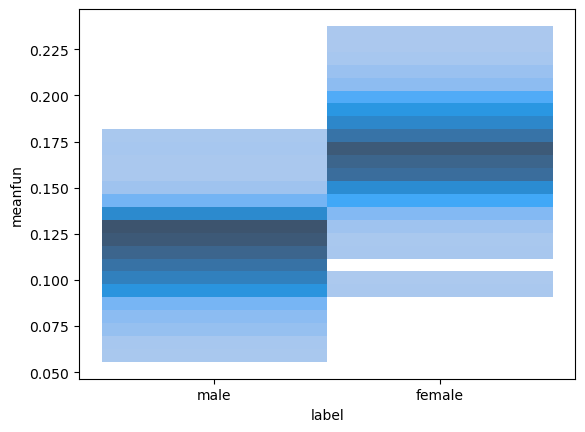

In [50]:
sns.histplot(data=df2, x="label", y="meanfun")
plt.show()

In de bovenstaande histogram is te zien dat de gemiddelde grondfrequentie bij vrouwen gemiddeld hoger ligt dan bij mannen. 

Ik heb gekozen voor het voorspellend model random forest. Dit model maakt gebruik van meerdere beslisbomen. Per aftakking wordt op basis van de uitkomst gekeken hoe groot de kans is dat het een man of vrouw is in dit geval. Om dit zo goed mogelijk te doen wordt de beslisboom meerdere keren doorlopen waarbij de volgorde in de beslisboom verschilt.

In [12]:
X = df.loc[:,"meanfreq":"median"] 
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Ik heb bepaald welke variabele ik wil voorspellen en welke variabelen ik daarvoor wil gebruiken. Ik heb de data gesplitst in train en test sets.

In [18]:
rf = RandomForestClassifier(random_state=1, n_estimators=10) 
rf = rf.fit(X_train, y_train)

IK heb bepaald wat het random forest model moet doen. Ik heb estimator 10 gebruikt om de snelheid te bevorederen, ook heb ik estimator 100 geprobeerd maar het verschil was minimaal (als je kijkt naar de score bij de volgende stap). Vervolgens heb ik het model getraind.

In [19]:
rf.score(X_test,y_test)

0.8380651945320715

Ik heb de nauwkeurigheid van het model berekend. Dit is boven de 80%, dus hoog genoeg.

In [28]:
y_pred = rf.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
cm = pd.DataFrame(cm, index=["man (werkelijk)", "vrouw (werkelijk)"], columns = ["man (voorspelling)", "vrouw (voorspelling)"]) 
cm

,man (voorspelling),vrouw (voorspelling)
man (werkelijk),378,79
vrouw (werkelijk),75,419


Ik heb een confusion matrix gemaakt waarin de voorspellingen te zien zijn. Ook is te zien wat het werkelijk is. Zo is dus te zien hoeveel voorspellingen goed zijn en hoeveel voorspellingen fout zijn.

In [25]:
(378+419)/(378+79+75+419)

0.8380651945320715

Ik heb de accuracy (nauwkeurigheid) nog een keer berekend en dit komt overeen met de nauwkeurigheid die ik eerder berekend heb. De nauwkeurigheid geeft aan welk percentage van de voorspellingen juist was. De nauwkeurigheid zit boven de 80% en is dus goed genoeg om mee te werken.

In [26]:
378/(378+75)

0.8344370860927153

In [27]:
419/(419+79)

0.8413654618473896

Ik heb voor zowel man als vrouw berekend wat de precision is. De precision geeft aan welk percentage van de voorspellingen man daadwerkelijk man was. Hetzelfde geldt voor vrouw. Beide scores voor precision zitten boven de 80% en zijn dus hoog genoeg.

In [29]:
378/(378+79)

0.8271334792122538

In [30]:
419/(419+75)

0.8481781376518218

Ik heb de recall voor zowel man als vrouw berekend. De recall geeft aan hoeveel van de daadwerkelijke mannen voorspelt zijn als man. Hetzelfde geldt voor vrouw. Ook hier zijn de scores hoger dan 80% en dus hoog genoeg.

Uiteindelijk kan geconcludeerd worden dat aan de hand van het random forest model nauwkeurigheidsscores van boven de 80% worden gehaald, het model voorspelt goed genoeg om mee te werken.